In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter

x_bins=60;y_bins=60;z_bins=240
sim=pd.read_csv("D:Desktop/helpingjade/results/dosetomedium_helpingjade.csv",delimiter= ',',comment='#',names=['x','y','z','dose'])
sim= sim.dose.values.reshape(x_bins, y_bins, z_bins)
sim=sim.T
sim=sim/(1.60218e-19)*(100*10**-12)





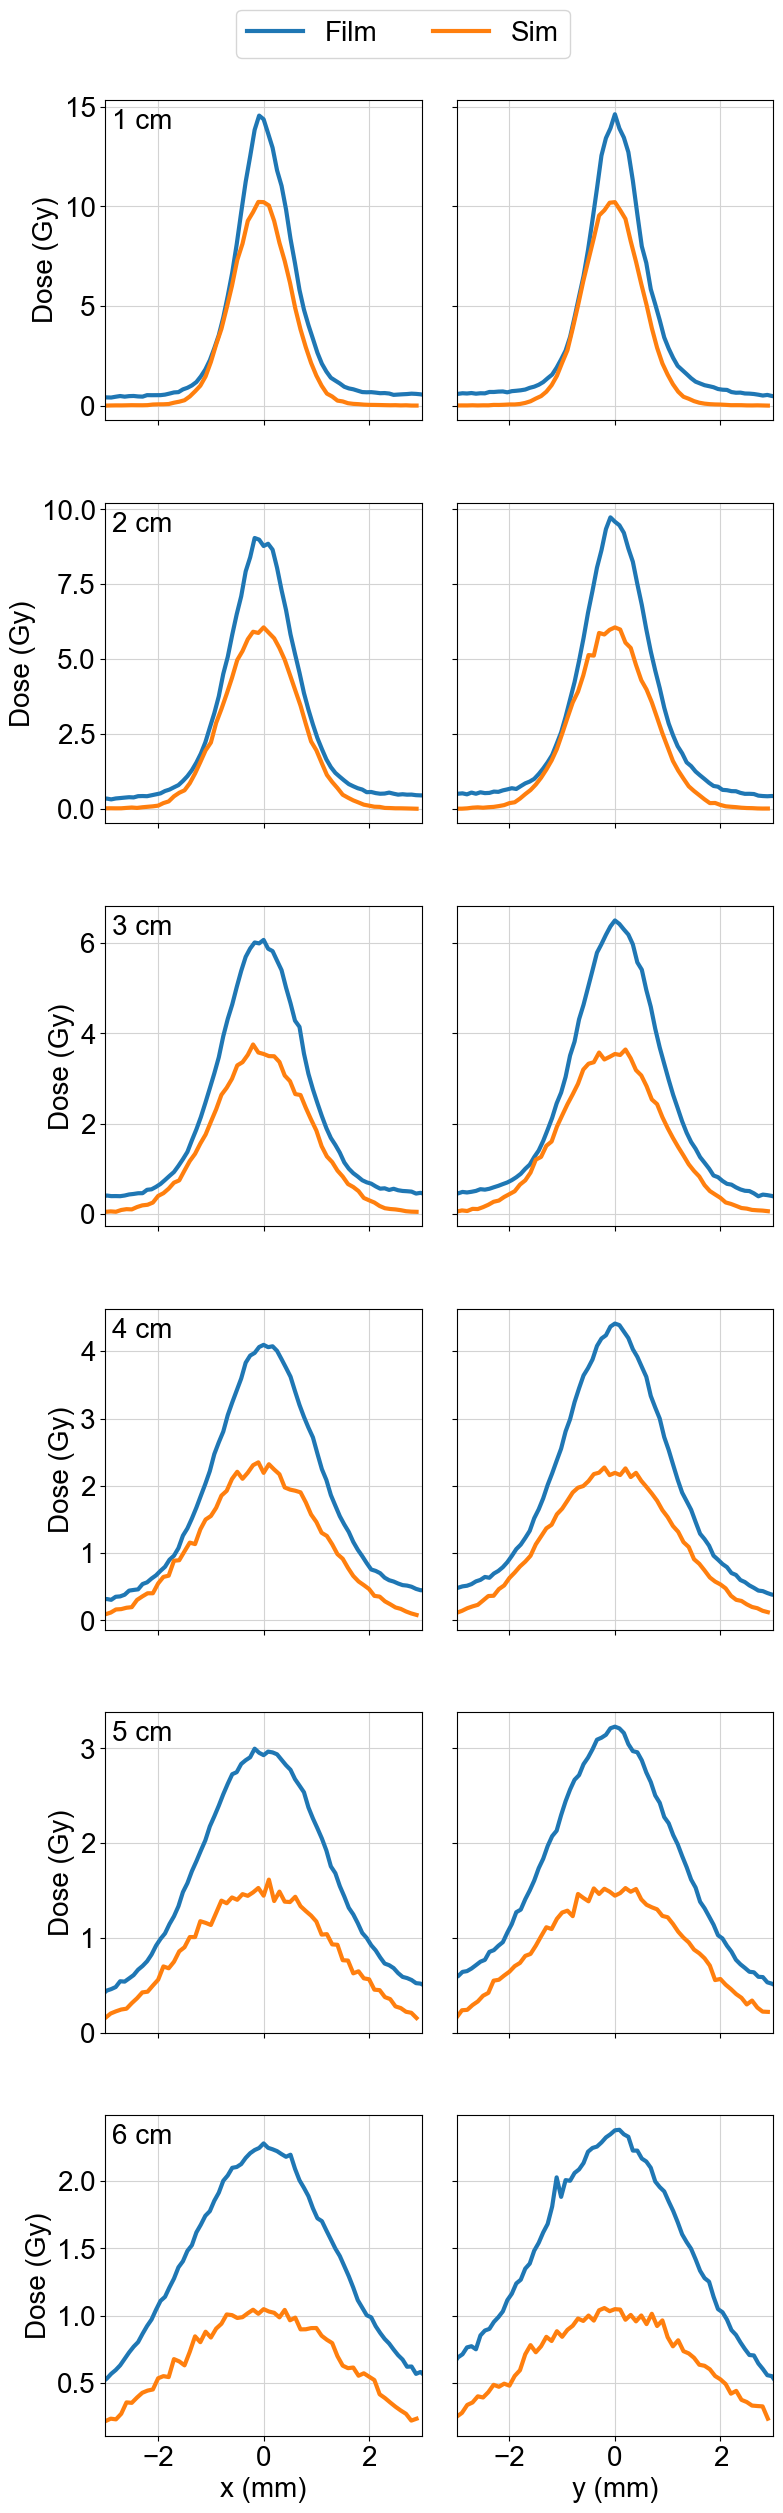

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

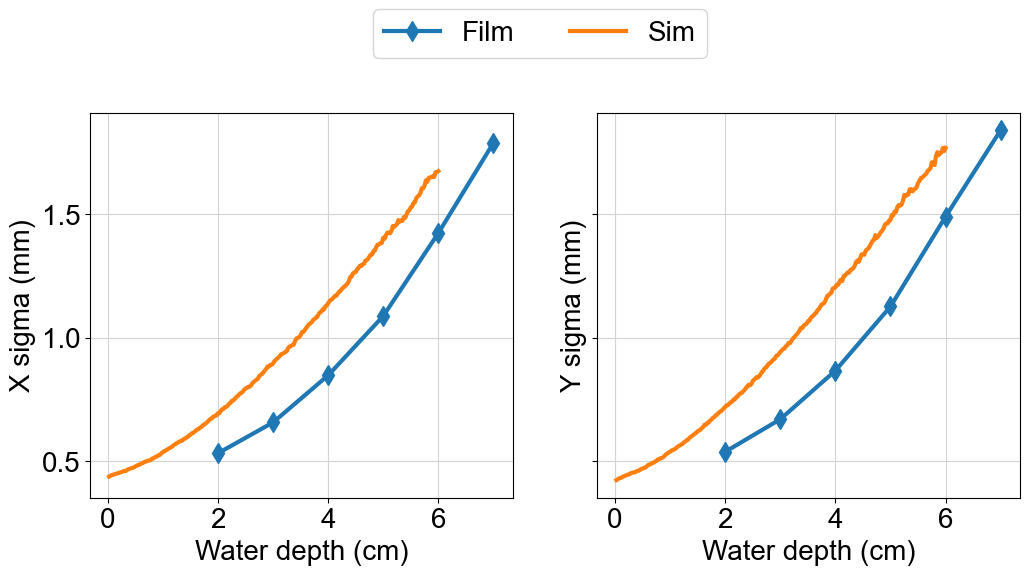

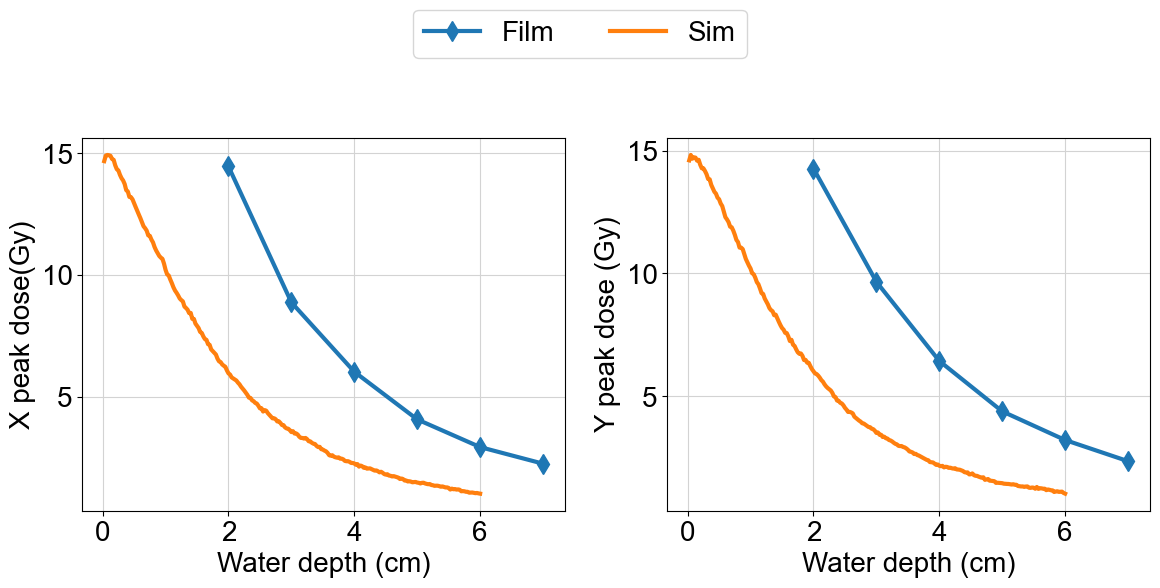

In [12]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)
plt.rcParams['axes.axisbelow'] = True

#z=[1,2,3,4,5,6]
z=[2,3,4,5,6,7]
z_sim=np.arange(0.25,60.25,0.25)/10
filmx=[]
filmy=[]
for i in np.arange(1,7):
    filmx.append(np.load("D:Desktop/helpingjade/film_x_"+str(i)+".npy"))
    filmy.append(np.load("D:Desktop/helpingjade/film_y_"+str(i)+".npy"))
filmx=np.array(filmx)
filmy=np.array(filmy)
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def gauss_fit(xdata,ydata):
    

    mean = sum(xdata * ydata) / sum(ydata)
    sigma = np.sqrt(sum(ydata * (xdata - mean)**2) / sum(ydata))
    popt,pcov = curve_fit(gaus,xdata,ydata,p0=[max(ydata), mean, sigma])
    #plt.plot(xdata,gaus(xdata,*popt),label='Gaussian fit',lw=1)
    return popt[-1],np.sqrt(np.diag(pcov))[-1]


xsigma_film=[]
xsigma_sim=[]
ysigma_film=[]
ysigma_sim=[]
for i in np.arange(1,7):
    xsigma_film.append(gauss_fit(np.arange(0,len(filmx[i-1]))*0.085,filmx[i-1])[0])
    ysigma_film.append(gauss_fit(np.arange(0,len(filmy[i-1]))*0.085,filmy[i-1])[0])

for i in np.arange(0,len(sim)):
    xsigma_sim.append(gauss_fit(np.arange(0,len(sim[i,30]))*0.1+1.1,sim[i,30])[0])
    ysigma_sim.append(gauss_fit(np.arange(0,len(sim[i,:,30]))*0.1+1.1,sim[i,:,30])[0])

    
fig, ax = plt.subplots(6, 2,figsize=(8,25),dpi=100,sharex=True,sharey='row')
for i in np.arange(1,7):
    figure(i,figsize=(6,6))
    ax[i-1,0].plot((np.arange(0,len(filmx[i-1]))-np.argmax(gaussian_filter(filmx[i-1],sigma=5)))*0.085,filmx[i-1],lw=3,label='Film')
    ax[i-1,0].plot(np.arange(0,len(sim[i*40-1,30]))*0.1-3,sim[i*40-1,30],lw=3,label='Sim')
    ax[i-1,0].set_xlim(-3,3)
    ax[i-1,1].plot((np.arange(0,len(filmy[i-1]))-np.argmax(gaussian_filter(filmy[i-1],sigma=5)))*0.085,filmy[i-1],lw=3)
    ax[i-1,1].plot(np.arange(0,len(sim[i*40-1,:,30]))*0.1-3,sim[i*40-1,:,30],lw=3)
    ax[i-1,1].set_xlim(-3,3)
    ax[i-1,0].grid(c='lightgray',zorder=0)
    ax[i-1,1].grid(c='lightgray',zorder=0)
    ax[i-1,0].annotate(str(i)+' cm',(5,210),xycoords='axes points')
ax[5,0].set_xlabel('x (mm)')
ax[5,1].set_xlabel('y (mm)')
for i in np.arange(0,6):
    ax[i,0].set_ylabel('Dose (Gy)')
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles,labels,bbox_to_anchor=(0, .99, 1, 0.2), loc="lower center", borderaxespad=0, ncol=2)
fig.tight_layout()


fig,ax =plt.subplots(1,2,figsize=(12,5),sharey=True)
ax[0].grid(c='lightgray',zorder=0)
ax[1].grid(c='lightgray',zorder=0)
ax[0].plot(z,xsigma_film,marker='d',ms=10,label='Film',lw=3)
ax[0].plot(z_sim,xsigma_sim,label='Sim',lw=3)
ax[1].plot(z,ysigma_film,marker='d',ms=10,lw=3)
ax[1].plot(z_sim,ysigma_sim,lw=3)
ax[0].set_ylabel('X sigma (mm)')
ax[1].set_ylabel('Y sigma (mm)')
ax[0].set_xlabel('Water depth (cm)')
ax[1].set_xlabel('Water depth (cm)')
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles,labels,bbox_to_anchor=(0, 0.99, 1, 0.2), loc="lower center", borderaxespad=0, ncol=2)


xpeak_film=[]
xpeak_sim=[]
ypeak_film=[]
ypeak_sim=[]
for i in np.arange(1,7):
    max_ind_x=np.argmax(gaussian_filter(filmx[i-1],sigma=5))
    max_ind_y=np.argmax(gaussian_filter(filmy[i-1],sigma=5))
    xpeak_film.append(np.mean(filmx[i-1,max_ind_x-1:max_ind_x+1]))
    ypeak_film.append(np.mean(filmy[i-1,max_ind_y-1:max_ind_y+1]))
    
for i in np.arange(0,len(sim)):
    xpeak_sim.append(np.mean(sim[i,30,30-1:30+1]))
    ypeak_sim.append(np.mean(sim[i,30-1:30+1,30]))
                        
                        
fig,ax =plt.subplots(1,2,figsize=(12,5))
ax[0].grid(c='lightgray',zorder=0)
ax[1].grid(c='lightgray',zorder=0)
ax[0].plot(z,xpeak_film,marker='d',ms=10,label='Film',lw=3)
ax[0].plot(z_sim,xpeak_sim,label='Sim',lw=3)
ax[1].plot(z,ypeak_film,marker='d',ms=10,lw=3)
ax[1].plot(z_sim,ypeak_sim,lw=3)
ax[0].set_ylabel('X peak dose(Gy)')
ax[1].set_ylabel('Y peak dose (Gy)')
ax[0].set_xlabel('Water depth (cm)')
ax[1].set_xlabel('Water depth (cm)')
handles, labels = ax[0].get_legend_handles_labels()
fig.tight_layout()
fig.legend(handles,labels,bbox_to_anchor=(0, 1.1, 1, 0.2), loc="lower center", borderaxespad=0, ncol=2)




In [ ]:
# The film
s:Ge/film1base/Parent = "WaterPhantom"
s:Ge/film1base/Type   = "TsBox"
s:Ge/film1base/Material = "baselayer"
d:Ge/film1base/HLX = 1.5 cm
d:Ge/film1base/HLY = 1.5 cm
d:Ge/film1base/HLZ = 139 um
d:Ge/film1base/TransX =  0.0 cm
d:Ge/film1base/TransY =  0.0 cm
d:Ge/film1base/TransZ =  0 cm
d:Ge/film1base/RotX= 0. deg
d:Ge/film1base/RotY= 0. deg
d:Ge/film1base/RotZ= 0. deg
s:Ge/film1base/Color = "Blue"
s:Ge/film1base/DrawingStyle = "FullWireFrame"
    

In [ ]:
s:Sc/gammafilm6/OutputFile = "./results/vhee_mag_film6_gamma"
i:Sc/gammafilm6/XBins = 300
i:Sc/gammafilm6/YBins = 300
i:Sc/gammafilm6/ZBins = 1

sv:Sc/gammafilm6/Report = 2 "Mean" "Standard_Deviation" # One or more of Sum, Mean, Histories, Count_In_Bin, Second_Moment, Variance, Standard_Deviation, Min, Max
s:Sc/gammafilm6/Quantity                         = "DoseToMedium"
s:Sc/gammafilm6/Component                        = "film6active"
b:Sc/gammafilm6/OutputToConsole                  = "FALSE"
s:Sc/gammafilm6/IfOutputFileAlreadyExists        = "Overwrite"
sv:Sc/gammafilm6/OnlyIncludeIfParticleNamed = 1 "gamma"


s:Sc/gammaxfilm6/OutputFile = "./results/vhee_mag_film6_gammax"
i:Sc/gammaxfilm6/XBins = 300
i:Sc/gammaxfilm6/YBins = 300
i:Sc/gammaxfilm6/ZBins = 1

sv:Sc/gammaxfilm6/Report = 2 "Mean" "Standard_Deviation" # One or more of Sum, Mean, Histories, Count_In_Bin, Second_Moment, Variance, Standard_Deviation, Min, Max
s:Sc/gammaxfilm6/Quantity                         = "DoseToMedium"
s:Sc/gammaxfilm6/Component                        = "film6active"
b:Sc/gammaxfilm6/OutputToConsole                  = "FALSE"
s:Sc/gammaxfilm6/IfOutputFileAlreadyExists        = "Overwrite"
sv:Sc/gammaxfilm6/OnlyIncludeIfParticleOrAncestorNamed = 1 "gamma"

s:Sc/totfilm6/OutputFile = "./results/vhee_mag_film6_tot"
i:Sc/totfilm6/XBins = 300
i:Sc/totfilm6/YBins = 300
i:Sc/totfilm6/ZBins = 1

sv:Sc/totfilm6/Report = 2 "Mean" "Standard_Deviation" # One or more of Sum, Mean, Histories, Count_In_Bin, Second_Moment, Variance, Standard_Deviation, Min, Max
s:Sc/totfilm6/Quantity                         = "DoseToMedium"
s:Sc/totfilm6/Component                        = "film6active"
b:Sc/totfilm6/OutputToConsole                  = "FALSE"
s:Sc/totfilm6/IfOutputFileAlreadyExists        = "Overwrite"